# Ex 03 dry

ex03_grid
Type,eta,K,equationStateID,parameterID
L,0,600,1,7
L,-3,0,nan,nan

ex03_ic_dry
eta,Psi0,T0
-0.0,-103.0,273.15
-3.0,-100.0,273.15

In [12]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')


project_path = os.path.dirname(os.getcwd())


grid_input_file_name = project_path + "/data/Grid_input/ex03_grid.csv"

ic_input_file_name = project_path + "/data/Grid_input/ex03_ic_dry.csv"

parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"

dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

grid_type = 'classical'

dz_min = -9999 # not required for grid_type = 'classical'

dz_max = -9999 # not required for grid_type = 'classical'

b = -9999      # not required for grid_type = 'classical'

psi_interp_model = "linear"

T_interp_model = "linear"

water_ponding_0 = -103.0
#consente di specificare una certa profondità della lama d'acqua in superficie per vedere come si infiltra

T_water_ponding_0 = 273.15

output_file_name =  project_path + "/data/Grid_NetCDF/ex03_grid_dry.nc"

output_title = '''Computational grid for ex03 dry.
                  '''
output_summary = '''

'''

output_date = ''

output_institution = 'GEOframe'



In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

In [14]:
# si può specificare una mappa di colori definiti in modo discreto
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b'])
os.chdir(os.path.join(os.getcwd(), "..", "output"))
#sito: colorbrewer 2.0
os.getcwd()

'C:\\Users\\emmat\\Desktop\\Progetto idrologia\\OMS_WHETGEO1D\\output'

In [15]:
ds = xr.open_dataset("ex03_dry_0000.nc")
ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:           (depth: 501, dualDepth: 501, time: 288)
Coordinates:
  * depth             (depth) float64 -1.992 -1.975 -1.958 ... -0.000375 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.983 -1.966 ... -0.00075 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-01T23:55:00
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 dry initial condition.
   

In [16]:
ds

<xarray.Dataset>
Dimensions:           (depth: 501, dualDepth: 501, time: 288)
Coordinates:
  * depth             (depth) float64 -1.992 -1.975 -1.958 ... -0.000375 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.983 -1.966 ... -0.00075 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-01T23:55:00
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 dry initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\emmat\Desktop\Progetto idrol...
    path_bottom_boundary_condition:     C:\Users\emmat\Desktop\Progetto idrol...
    path_grid:                          C:\Users\emmat\Desktop\Progetto idrol...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

In [17]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/ex03_save_dates.csv',datetime_index=True)
rain.head()

,0
Datetime,
2020-01-01 00:00:00,1.0
2020-01-01 00:05:00,1.0
2020-01-01 00:10:00,1.0
2020-01-01 00:15:00,1.0
2020-01-01 00:20:00,1.0


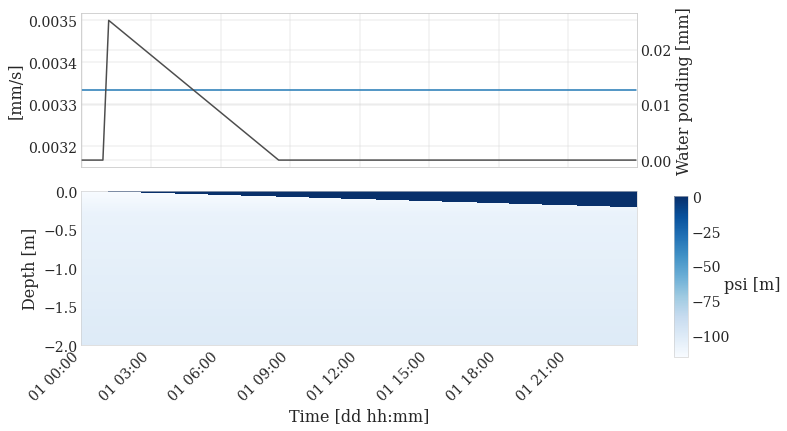

In [18]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'][0:288]/300)
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('psi [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

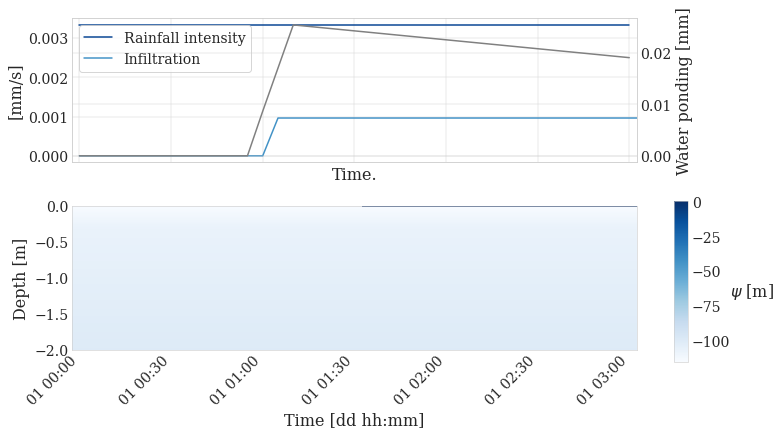

In [19]:
start = '2020-01-01 00:00'
end = '2020-01-01 03:00'

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.sel(time=slice(start,end)), rain['0'][start:end]/300,  color='#084594', label='Rainfall intensity')
(-ds.darcyVelocity.sel(dualDepth=0, method='nearest')*1000).plot(ax=ax[0], color='#4292c6', label='Infiltration')

ax[0].set_ylabel('[mm/s]')
ax[0].set_title(None)
ax[0].legend(loc='upper left')

ax1=ax[0].twinx()
ds.waterVolume.sel(time=slice(start,end)).sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.5')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.sel(time=slice(start,end)).plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

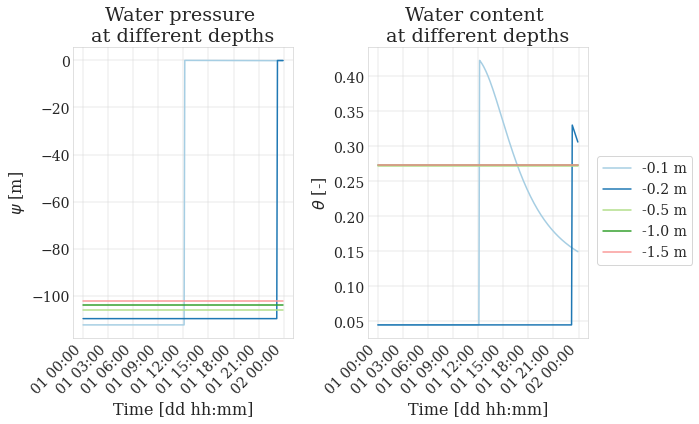

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.1,  method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.2,  method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.5,  method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-1.0,  method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-1.5,  method='nearest').plot(ax=ax1, color=colors[4])


ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[3])
ds.theta.sel(depth=-1.5, method='nearest').plot(ax=ax2, label = '-1.5 m', color=colors[4])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

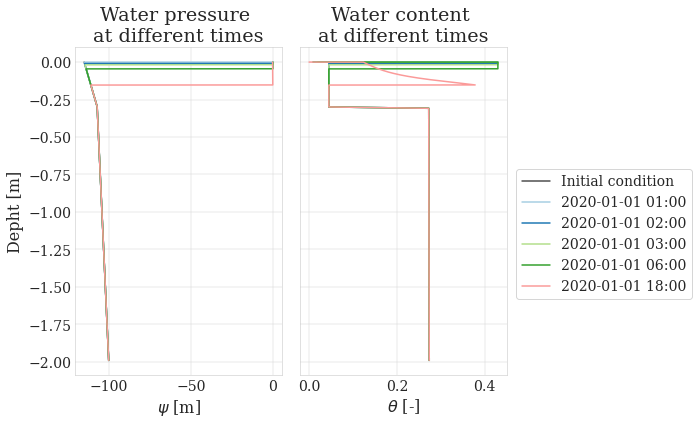

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2020-01-01 01:00').plot(ax=ax1, y='depth', label='2020-01-01 01:00', color=colors[0])
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax1, y='depth', label='2020-01-01 02:00', color=colors[1])
ds.psi.sel(time='2020-01-01 03:00').plot(ax=ax1, y='depth', label='2020-01-01 03:00', color=colors[2])
ds.psi.sel(time='2020-01-01 06:00').plot(ax=ax1, y='depth', label='2020-01-01 06:00', color=colors[3])
ds.psi.sel(time='2020-01-01 18:00').plot(ax=ax1, y='depth', label='2020-01-01 18:00', color=colors[4])
# ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2020-01-01 01:00').plot(ax=ax2, y='depth', label='2020-01-01 01:00', color=colors[0])
ds.theta.sel(time='2020-01-01 02:00').plot(ax=ax2, y='depth', label='2020-01-01 02:00', color=colors[1])
ds.theta.sel(time='2020-01-01 03:00').plot(ax=ax2, y='depth', label='2020-01-01 03:00', color=colors[2])
ds.theta.sel(time='2020-01-01 06:00').plot(ax=ax2, y='depth', label='2020-01-01 06:00', color=colors[3])
ds.theta.sel(time='2020-01-01 18:00').plot(ax=ax2, y='depth', label='2020-01-01 18:00', color=colors[4])
# ds.theta.sel(time='2020-01-02 00:00').plot(ax=ax2, y='depth', label='2020-01-02 00:00', color=colors[5])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

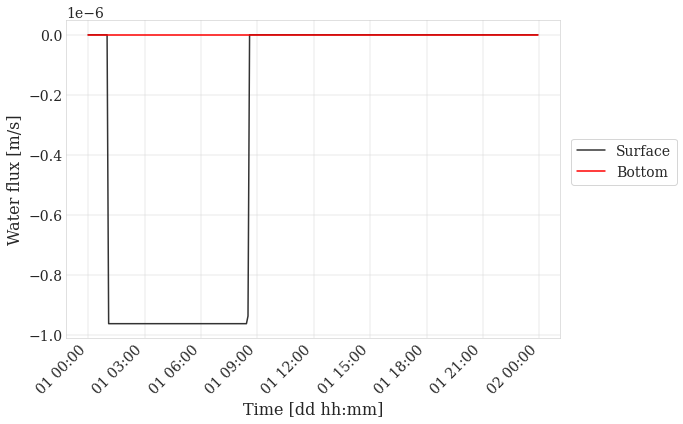

In [11]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()